<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#22회-통계분석" data-toc-modified-id="22회-통계분석-1">22회 통계분석</a></span><ul class="toc-item"><li><span><a href="#회사는-제품에-금속-재질-함유량의-분산이-1.3을-넘으면-불량이라고-판단한다.-회사에서는-품질경영팀으로부터-제조사별로-금속함유량이-차이가-난다고-제보를-받았다.-해당-금속함유량-데이터에-대한-검정을-수행하시오.-(유의확률:0.05)-" data-toc-modified-id="회사는-제품에-금속-재질-함유량의-분산이-1.3을-넘으면-불량이라고-판단한다.-회사에서는-품질경영팀으로부터-제조사별로-금속함유량이-차이가-난다고-제보를-받았다.-해당-금속함유량-데이터에-대한-검정을-수행하시오.-(유의확률:0.05)--1.1">회사는 제품에 금속 재질 함유량의 분산이 1.3을 넘으면 불량이라고 판단한다. 회사에서는 품질경영팀으로부터 제조사별로 금속함유량이 차이가 난다고 제보를 받았다. 해당 금속함유량 데이터에 대한 검정을 수행하시오. (유의확률:0.05) <br></a></span><ul class="toc-item"><li><span><a href="#연구가설과-귀무가설을-작성시오" data-toc-modified-id="연구가설과-귀무가설을-작성시오-1.1.1">연구가설과 귀무가설을 작성시오<br></a></span></li><li><span><a href="#가설을-양측-검정-" data-toc-modified-id="가설을-양측-검정--1.1.2">가설을 양측 검정 <br></a></span></li><li><span><a href="#검정통계량,-가설-채택" data-toc-modified-id="검정통계량,-가설-채택-1.1.3">검정통계량, 가설 채택<br></a></span></li></ul></li><li><span><a href="#200개의-Lot별-불량-제품-수량-데이터에-따라-아래의-값을-구하시오.-" data-toc-modified-id="200개의-Lot별-불량-제품-수량-데이터에-따라-아래의-값을-구하시오.--1.2">200개의 Lot별 불량 제품 수량 데이터에 따라 아래의 값을 구하시오. <br></a></span></li></ul></li></ul></div>

# 22회 통계분석 

## 회사는 제품에 금속 재질 함유량의 분산이 1.3을 넘으면 불량이라고 판단한다. 회사에서는 품질경영팀으로부터 제조사별로 금속함유량이 차이가 난다고 제보를 받았다. 해당 금속함유량 데이터에 대한 검정을 수행하시오. (유의확률:0.05) <br>
### 연구가설과 귀무가설을 작성시오<br>
### 가설을 양측 검정 <br>
### 검정통계량, 가설 채택<br>


In [3]:
import pandas as pd 
import numpy as np 
## 데이터 불러오기 
df = pd.read_csv('../data/metalicity')
df

,metalicity
0,42.731551
1,46.429668
2,45.754023
3,45.808060
4,44.072529
...,...
145,45.915727
146,45.277868
147,45.082157
148,44.297235


In [22]:
#이 경우는 데이터의 평균 검정을 "데이터의 편차제곱합"의 평균 검정으로 대체해서 시행한다.
from scipy.stats import ttest_1samp, shapiro

df['편차제곱'] = np.square(df.metalicity - df.metalicity.mean())

# 먼저 정규성에 대해 검증을 수행한다.
ret = shapiro(df.편차제곱)
print(f'정규성 검정 결과 p-value가 {ret.statistic:.10f} 이므로 정규성 조건을 만족한다.')

stat, pvalue = ttest_1samp(df.편차제곱, popmean=1.3, alternative='greater')
print(f'''가설검정
      귀무가설 : 샘플의 금속함유량은 1.3을 초과한다.
      대립가설 : 샘플의 금속함유량은 1.3을 초과하지 않는다.
      
데이터의 편차제곱의 평균검정 방식으로 분산 차이검정을 하기 위해 ttest_1samp를 적용하였고,
      검정통계량은 {stat:.3f}, p-value는 {pvalue:.20f}이다.
      
따라서 유의수준 0.05에서 귀무가설을 기각할 수 없다.
''')

정규성 검정 결과 p-value가 0.6957845817 이므로 정규성 조건을 만족한다.
가설검정
      귀무가설 : 샘플의 금속함유량은 1.3을 초과한다.
      대립가설 : 샘플의 금속함유량은 1.3을 초과하지 않는다.
      
데이터의 편차제곱의 평균검정 방식으로 분산 차이검정을 하기 위해 ttest_1samp를 적용하였고,
      검정통계량은 -7.122, p-value는 0.99999999997889799097이다.
      
따라서 유의수준 0.05에서 귀무가설을 기각할 수 없다.



귀무가설 : 정규성을 가진다.  <br>
대립가설 : 정규성을 가지지 않는다. <br>

p-value > 0.05 이므로 귀무가설을 기각하지 못함 <br>
즉, 정규성을 띈다. 


## 200개의 Lot별 불량 제품 수량 데이터에 따라 아래의 값을 구하시오. <br>
- p관리도 : 전체품목의 표본에서 부적합 부품의 수의 비율 
2.1 p관리도에 따라 관리중심선(center line), 관리 상한선, 하한선 구하시오<br>
2.2 관리도 시각화 하시오<br>



In [3]:
import pandas as pd
import numpy as np

df2 = pd.read_csv('../data/lot_quality.csv')
df2 = df2.set_index('lot')
df2

,생산수량,불량수량
lot,,
1,587,19
2,588,15
3,455,19
4,666,12
5,750,15
...,...,...
196,631,18
197,565,21
198,570,12


In [8]:
df2['p'] = df2.불량수량/df2.생산수량
df2['UCL'] = df2.p + (3 * (df2.p * (1-df2.p) / df2.생산수량)**0.5)
df2['LCL'] = df2.p - (3 * (df2.p * (1-df2.p) / df2.생산수량)**0.5)

# 관리중심선 : 전체불량비율
CL = df2.불량수량.sum() / df2.생산수량.sum()
df2

,생산수량,불량수량,p,UCL,LCL
lot,,,,,
1,587,19,0.032368,0.054282,0.010454
2,588,15,0.025510,0.045017,0.006004
3,455,19,0.041758,0.069892,0.013625
4,666,12,0.018018,0.033481,0.002555
5,750,15,0.020000,0.035336,0.004664
...,...,...,...,...,...
196,631,18,0.028526,0.048407,0.008645
197,565,21,0.037168,0.061044,0.013292
198,570,12,0.021053,0.039092,0.003013


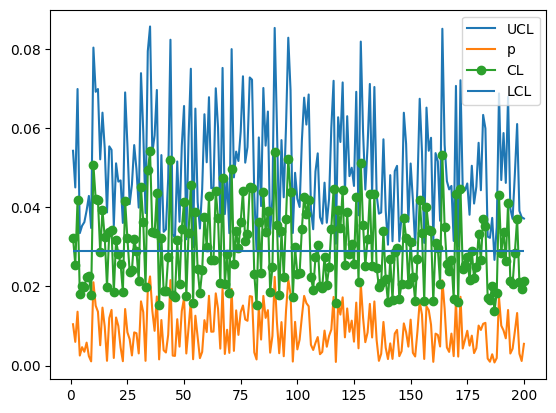

In [9]:
import matplotlib.pyplot as plt
plt.plot(df2.UCL)
plt.plot(df2.LCL)
plt.plot(df2.p, marker='o')
plt.hlines(CL, 1, 200)
plt.legend(['UCL', 'p', 'CL', 'LCL'])


3.표에 제품 1, 2를 만드는데 재료 a, b, c가 일부 사용되며, 제품 1과 2를 만들 때 12만원과 18만원을 벌 수 있다. 재료는 한정적으로 주어지는데, 이때 최대 수익을 낼 수 있을 때의 제품 1과 제품2의 개수를 구하라.
재료 공급량 { a: 1300, b: 1000, c:1200 }(10점)

-         재료a   재료b   재료c
- 제품1   20      20      20
- 제품2   40      30      30


In [42]:
import math
print('''이 문제는,
      제품1과 제품2의 개수쌍 별로 얼마나 수익을 내는지를 알면 된다.
      단 여기서 개수쌍은 재료a, b, c의 한도에 도달하는 순간으로 결정된다.
''')
test = pd.DataFrame()
count1 = 1
count2 = 1
a1 = 20
b1 = 20
c1 = 20
a2 = 40
b2 = 30
c2 = 30
price1 = 12
price2 = 18

maxa = 1300

for i in range(int(maxa / a1)):
    maxa = 1300
    maxb = 1000
    maxc = 1200
    count1 = i
    
    #제품1 재고반영
    maxa -= a1*count1
    maxb -= b1*count1
    maxc -= c1*count1

    #제품2 가능개수 확인
    poss_a = math.trunc(maxa / a2)
    poss_b = math.trunc(maxb / b2)
    poss_c = math.trunc(maxc / c2)

    if (poss_a < 1) or (poss_b < 1) or (poss_c < 1)  :
        break   
    else:
        count2 = min([poss_a, poss_b, poss_c])

    test.loc[i, '제품1 개수'] = count1
    test.loc[i, '제품2 개수'] = count2
    test.loc[i, '제품1 매출'] = count1*price1
    test.loc[i, '제품2 매출'] = count2*price2
    test.loc[i, '매출 합계'] = count1*price1 + count2*price2
test.sort_values(by='매출 합계', ascending=False, inplace=True)
test



이 문제는,
      제품1과 제품2의 개수쌍 별로 얼마나 수익을 내는지를 알면 된다.
      단 여기서 개수쌍은 재료a, b, c의 한도에 도달하는 순간으로 결정된다.



,제품1 개수,제품2 개수,제품1 매출,제품2 매출,매출 합계
11,11.0,26.0,132.0,468.0,600.0
38,38.0,8.0,456.0,144.0,600.0
20,20.0,20.0,240.0,360.0,600.0
29,29.0,14.0,348.0,252.0,600.0
17,17.0,22.0,204.0,396.0,600.0
32,32.0,12.0,384.0,216.0,600.0
14,14.0,24.0,168.0,432.0,600.0
35,35.0,10.0,420.0,180.0,600.0
23,23.0,18.0,276.0,324.0,600.0
26,26.0,16.0,312.0,288.0,600.0



4.상품 a와 b가 있을 때 다음과 같은 구매 패턴이 있다고 함. ['a','a','b','b','a','a','a','a','b','b','b','b','b','a','a','b','b','a','b','b']<br>
4.1 구매하는 패턴으로 봐서 두 상품이 연관이 있는지 가설 세우고 검정하시오<br>
4.2 연구가설 귀무가설 세우시오<br>
4.3 가설 채택하시오

In [41]:
from statsmodels.sandbox.stats.runs import runstest_1samp

test = pd.DataFrame()
sample =['a','a','b','b','a','a','a','a','b','b','b','b','b','a','a','b','b','a','b','b']
for i in range(len(sample)):
    test.loc[i, 'data'] = 1 if sample[i] == 'a' else 0
test

stat, pvalue = runstest_1samp(test)

print(stat, pvalue)

-1.1144881152070183 0.26506984027306035


* 분석결과 : 유의수준 5% 하에서 p-value값이 0.05보다 크므로, 상품 a와 b의 구매에는 연관이 없다. 